**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\senth\AIML\Anaconda3\lib\site-packages\IPython\core\interactivesh

### Check no.of records and features given in each dataset

In [3]:
## Books
##--------
## Books has 1 null object in bookAuthor column and 2 null objets in publisher column
## Users
##------
## Users has many entries with Age column as null
## Ratings
##--------
## Ratings does not have null values 

<h3>Books</h3>

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books[np.logical_or(books['bookAuthor'].isnull(),books['publisher'].isnull())]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [6]:
##books.fillna('None',inplace=True)

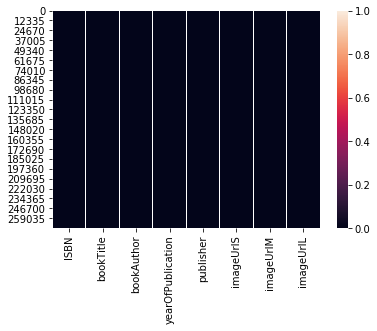

In [7]:
sns.heatmap(books.isnull())

<h3>Users</h3>

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
users[users['Age'].isnull()]

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
11,12,"fort bragg, california, usa",NaN
13,14,"mediapolis, iowa, usa",NaN
14,15,"calgary, alberta, canada",NaN
15,16,"albuquerque, new mexico, usa",NaN


In [10]:
##users.fillna(0,inplace=True)

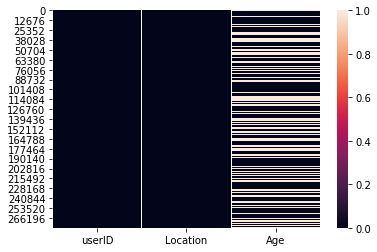

In [11]:
sns.heatmap(users.isnull())

In [12]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


<h3>Ratings</h3>

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


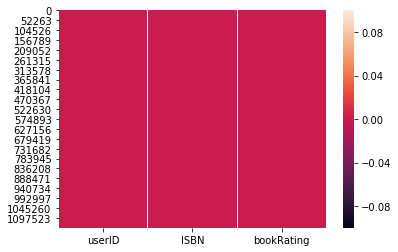

In [15]:
sns.heatmap(ratings.isnull())

## Exploring books dataset

In [16]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [17]:
books.drop(columns=['imageUrlS','imageUrlM','imageUrlL'],axis=1,inplace=True)

In [18]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [19]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [20]:
books[np.logical_or(books['yearOfPublication']=='DK Publishing Inc', books['yearOfPublication']=='Gallimard')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [21]:
books.drop(index=[209538, 220731, 221678],axis=0,inplace=True)

In [22]:
books[np.logical_or(books['yearOfPublication']=='DK Publishing Inc', books['yearOfPublication']=='Gallimard')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [23]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null object
publisher            271355 non-null object
dtypes: object(5)
memory usage: 12.4+ MB


In [24]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int32')

In [25]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [26]:
books[books['publisher'].isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [27]:
books[books['publisher'].isna()].count()

ISBN                 2
bookTitle            2
bookAuthor           2
yearOfPublication    2
publisher            0
dtype: int64

In [28]:
books.dropna(axis=0,inplace=True)

In [29]:
books[books['publisher'].isna()].count()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

## Exploring Users dataset

In [30]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Get all unique values in ascending order for column `Age`

In [32]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [33]:
users[np.logical_or(users['Age']<5,users['Age']>90)]['Age'].count()

1312

In [34]:
users[users['Age'].isna()].count()

userID      110762
Location    110762
Age              0
dtype: int64

In [35]:
uniqueAge = users[np.logical_or(users['Age']<5,users['Age']>90)]['Age'].unique()
uniqueAge

array([  0.,   1., 103., 104., 231.,   3., 119.,   2.,  93.,   4., 114.,
       230., 239., 148., 151., 101., 201.,  96., 123., 244., 133.,  91.,
       128.,  94., 141., 110.,  97., 219., 124.,  92., 175., 172., 209.,
       212., 237., 162., 100., 156., 136.,  95., 106.,  99., 108., 210.,
       199., 147., 168., 132., 159., 186., 152., 102., 116., 200., 115.,
       226., 137., 207., 229., 138., 109., 105., 228., 183., 204.,  98.,
       223., 113., 208., 107., 157., 111., 146., 118., 220., 143., 140.,
       189., 127.])

In [36]:
users['Age'].replace(to_replace=uniqueAge, value='NaN',inplace=True)

In [37]:
users[users['Age'].isna()].count()

userID      110762
Location    110762
Age              0
dtype: int64

### Replace null values in column `Age` with mean

In [38]:
users['Age'].unique()

array([nan, 18.0, 17.0, 61.0, 26.0, 14.0, 25.0, 19.0, 46.0, 55.0, 32.0,
       24.0, 20.0, 34.0, 23.0, 51.0, 31.0, 21.0, 44.0, 30.0, 57.0, 43.0,
       37.0, 41.0, 54.0, 42.0, 50.0, 39.0, 53.0, 47.0, 36.0, 28.0, 35.0,
       13.0, 58.0, 49.0, 38.0, 45.0, 62.0, 63.0, 27.0, 33.0, 29.0, 66.0,
       40.0, 15.0, 60.0, 'NaN', 79.0, 22.0, 16.0, 65.0, 59.0, 48.0, 72.0,
       56.0, 67.0, 80.0, 52.0, 69.0, 71.0, 73.0, 78.0, 9.0, 64.0, 12.0,
       74.0, 75.0, 76.0, 83.0, 68.0, 11.0, 77.0, 70.0, 8.0, 7.0, 81.0,
       10.0, 5.0, 6.0, 84.0, 82.0, 90.0, 85.0, 86.0, 87.0, 89.0, 88.0],
      dtype=object)

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null object
dtypes: int64(1), object(2)
memory usage: 6.4+ MB


In [40]:
meanAge = np.ceil(users[~np.logical_or(users['Age']=='NaN',users['Age'].isna())]['Age'].mean())
meanAge

35.0

In [41]:
users['Age'].fillna(meanAge,inplace=True)

In [42]:
users['Age'].replace('NaN',meanAge,inplace=True)

In [43]:
users['Age'].value_counts()

35.0    116268
24.0      5687
25.0      5618
26.0      5547
23.0      5456
27.0      5383
28.0      5347
29.0      5293
32.0      4781
30.0      4778
22.0      4714
33.0      4699
31.0      4665
34.0      4656
21.0      4438
20.0      4056
19.0      3950
36.0      3896
18.0      3703
37.0      3582
38.0      3404
39.0      3234
40.0      3142
17.0      3044
41.0      2919
43.0      2816
42.0      2758
44.0      2745
16.0      2570
46.0      2526
         ...  
69.0       373
70.0       315
71.0       286
72.0       223
73.0       200
12.0       192
74.0       170
11.0       121
75.0       119
76.0       114
10.0        84
77.0        82
78.0        73
79.0        62
9.0         62
8.0         54
80.0        48
81.0        46
7.0         27
5.0         26
82.0        25
83.0        24
84.0        22
6.0         18
85.0        17
86.0         7
87.0         6
90.0         5
88.0         2
89.0         2
Name: Age, Length: 86, dtype: int64

In [44]:
users['Age'].unique()

array([35., 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59., 48.,
       72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12., 74.,
       75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,  6.,
       84., 82., 90., 85., 86., 87., 89., 88.])

### Change the datatype of `Age` to `int`

In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [46]:
users['Age'] = users['Age'].astype('int32')

In [47]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [48]:
ratings.shape

(1149780, 3)

In [49]:
n_users = users.shape[0]
n_books = books.shape[0]

In [50]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [51]:
books['ISBN'].count()

271354

In [52]:
ratings['ISBN'].count()

1149780

In [53]:
books_ratings = pd.merge(books,ratings,how='inner',on='ISBN')
books_ratings.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [60]:
books_ratings.count()

ISBN                 1031129
bookTitle            1031129
bookAuthor           1031129
yearOfPublication    1031129
publisher            1031129
userID               1031129
bookRating           1031129
dtype: int64

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [54]:
users.count()

userID      278858
Location    278858
Age         278858
dtype: int64

In [55]:
books_ratings.count()

ISBN                 1031129
bookTitle            1031129
bookAuthor           1031129
yearOfPublication    1031129
publisher            1031129
userID               1031129
bookRating           1031129
dtype: int64

In [56]:
user_books_ratings = pd.merge(users,books_ratings,how='inner',on='userID')
user_books_ratings.head(10)

,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating
0,2,"stockton, california, usa",18,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,8,"timmins, ontario, canada",35,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,8,"timmins, ontario, canada",35,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0
3,8,"timmins, ontario, canada",35,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0
4,8,"timmins, ontario, canada",35,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0
5,8,"timmins, ontario, canada",35,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,0
6,8,"timmins, ontario, canada",35,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,0
7,8,"timmins, ontario, canada",35,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,0
8,8,"timmins, ontario, canada",35,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,0
9,8,"timmins, ontario, canada",35,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,5


In [61]:
user_books_ratings.count()

userID               1031129
Location             1031129
Age                  1031129
ISBN                 1031129
bookTitle            1031129
bookAuthor           1031129
yearOfPublication    1031129
publisher            1031129
bookRating           1031129
dtype: int64

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [62]:
user_books_ratings['bookRating'].value_counts()

0     647291
8      91803
10     71225
7      66401
9      60776
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: bookRating, dtype: int64

In [65]:
user_books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1031128
Data columns (total 9 columns):
userID               1031129 non-null int64
Location             1031129 non-null object
Age                  1031129 non-null int32
ISBN                 1031129 non-null object
bookTitle            1031129 non-null object
bookAuthor           1031129 non-null object
yearOfPublication    1031129 non-null int32
publisher            1031129 non-null object
bookRating           1031129 non-null int64
dtypes: int32(2), int64(2), object(5)
memory usage: 70.8+ MB


In [68]:
user_books_ratings[user_books_ratings['bookRating']!=0].count()

userID               383838
Location             383838
Age                  383838
ISBN                 383838
bookTitle            383838
bookAuthor           383838
yearOfPublication    383838
publisher            383838
bookRating           383838
dtype: int64

In [69]:
nz_user_books_ratings = user_books_ratings[user_books_ratings['bookRating']!=0]
nz_user_books_ratings

,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating
1,8,"timmins, ontario, canada",35,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
9,8,"timmins, ontario, canada",35,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,5
12,8,"timmins, ontario, canada",35,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,5
13,8,"timmins, ontario, canada",35,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,5
15,8,"timmins, ontario, canada",35,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,6
16,8,"timmins, ontario, canada",35,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999,Kensington Publishing Corp.,6
17,8,"timmins, ontario, canada",35,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,7
19,9,"germantown, tennessee, usa",35,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,6
22,12,"fort bragg, california, usa",35,1879384493,If I'd Known Then What I Know Now: Why Not Lea...,J. R. Parrish,2003,Cypress House,10
23,14,"mediapolis, iowa, usa",35,0061076031,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,Mary-Kate &amp; Ashley Olsen,2000,HarperEntertainment,5


In [71]:
nz_user_books_ratings.count()

userID               383838
Location             383838
Age                  383838
ISBN                 383838
bookTitle            383838
bookAuthor           383838
yearOfPublication    383838
publisher            383838
bookRating           383838
dtype: int64

### Find out which rating has been given highest number of times

In [72]:
nz_user_books_ratings['bookRating'].value_counts()

8     91803
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [101]:
nz_user_books_ratings['userID'].value_counts()

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
216045       1
211939       1
251025       1
177106       1
173008       1
142273       1
123832       1
81059        1
83116        1
89263        1
267369       1
44433        1
42384        1
23951        1
33787        1
13698        1
269575       1
265477       1
261371       1
214252       1
109745       1
195803       1
179411       1
154831       1
152782       1
148684       1
124088       1
105655       1
103606       1
211175       1
Name: userID, Length: 68091, dtype: int64

In [102]:
users = nz_user_books_ratings['userID'].value_counts().index

In [103]:
ratingsCount = nz_user_books_ratings['userID'].value_counts().values

In [106]:
user_ratings_count = pd.DataFrame(data={'users':users,'ratingsCount':ratingsCount})
user_ratings_count

,users,ratingsCount
0,11676,6943
1,98391,5689
2,189835,1899
3,153662,1845
4,23902,1180
5,235105,1020
6,76499,1012
7,171118,962
8,16795,959
9,248718,941


In [108]:
user_gt100_ratings_count = user_ratings_count[user_ratings_count['ratingsCount']>=100]
user_gt100_ratings_count

,users,ratingsCount
0,11676,6943
1,98391,5689
2,189835,1899
3,153662,1845
4,23902,1180
5,235105,1020
6,76499,1012
7,171118,962
8,16795,959
9,248718,941


In [110]:
final_users_books_ratings = pd.merge(user_gt100_ratings_count,nz_user_books_ratings,how='inner',left_on='users',right_on='userID')
final_users_books_ratings

,users,ratingsCount,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating
0,11676,6943,11676,"n/a, n/a, n/a",35,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
1,11676,6943,11676,"n/a, n/a, n/a",35,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,9
2,11676,6943,11676,"n/a, n/a, n/a",35,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,8
3,11676,6943,11676,"n/a, n/a, n/a",35,0440234743,The Testament,John Grisham,1999,Dell,9
4,11676,6943,11676,"n/a, n/a, n/a",35,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,8
5,11676,6943,11676,"n/a, n/a, n/a",35,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,7
6,11676,6943,11676,"n/a, n/a, n/a",35,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,10
7,11676,6943,11676,"n/a, n/a, n/a",35,0971880107,Wild Animus,Rich Shapero,2004,Too Far,6
8,11676,6943,11676,"n/a, n/a, n/a",35,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,10
9,11676,6943,11676,"n/a, n/a, n/a",35,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,8


In [115]:
np.count_nonzero(final_users_books_ratings['userID'].unique())

449

In [116]:
np.count_nonzero(user_gt100_ratings_count['users'].unique())

449

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [117]:
final_users_books_ratings[final_users_books_ratings.isnull()].count()

users                0
ratingsCount         0
userID               0
Location             0
Age                  0
ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
bookRating           0
dtype: int64

In [118]:
final_users_books_ratings[final_users_books_ratings.isna()].count()

users                0
ratingsCount         0
userID               0
Location             0
Age                  0
ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
bookRating           0
dtype: int64

In [119]:
final_users_books_ratings.shape

(103269, 11)

In [148]:
np.count_nonzero(final_users_books_ratings.ISBN.unique())

66572

In [120]:
nz_user_books_ratings.shape

(383838, 9)

In [121]:
user_books_ratings.shape

(1031129, 9)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [122]:
final_users_books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103269 entries, 0 to 103268
Data columns (total 11 columns):
users                103269 non-null int64
ratingsCount         103269 non-null int64
userID               103269 non-null int64
Location             103269 non-null object
Age                  103269 non-null int32
ISBN                 103269 non-null object
bookTitle            103269 non-null object
bookAuthor           103269 non-null object
yearOfPublication    103269 non-null int32
publisher            103269 non-null object
bookRating           103269 non-null int64
dtypes: int32(2), int64(4), object(5)
memory usage: 8.7+ MB


In [225]:
uniqueUsersAsc = np.sort(final_users_books_ratings.userID.unique())

In [138]:
R_df = final_users_books_ratings.pivot_table(index='userID',columns='ISBN',values='bookRating').fillna(0)

In [139]:
R_df.shape

(449, 66572)

In [156]:
R_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
from scipy.sparse.linalg import svds

In [267]:
U, sigma, Vt = svds(R_df, k = 50)

In [268]:
U.shape

(449, 50)

In [269]:
sigma.shape

(50,)

In [270]:
Vt.shape

(50, 66572)

In [271]:
sigma = np.diag(sigma)
sigma

array([[147.92121613,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.3438051 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07400599, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58327277,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.72875357,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.30978318]])

In [272]:
np.dot(U,sigma).shape

(449, 50)

In [274]:
svd_users_books_ratings = np.dot(np.dot(U,sigma),Vt)
recommendation_df = pd.DataFrame(svd_users_books_ratings,columns=R_df.columns,index=R_df.index)
recommendation_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.025341,-0.002146,-1.430820e-03,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
2110,-0.010012,-0.003669,-2.446297e-03,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2276,-0.015054,-0.015457,-1.030440e-02,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
4017,-0.021499,0.035602,2.373467e-02,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4385,0.002077,-0.007965,-5.310012e-03,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773
5582,-0.002046,0.018614,1.240949e-02,0.018614,0.018614,0.007966,0.022983,-0.005167,-0.005167,0.018298,...,0.002278,0.003343,0.029729,-0.013429,-0.069757,0.008082,0.003330,0.001519,0.008519,0.072081
6242,-0.015920,0.020221,1.348068e-02,0.020221,0.020221,0.014194,0.016776,-0.002339,-0.002339,0.031493,...,0.002596,0.003667,0.030025,0.012455,0.030068,0.013586,0.001308,0.001731,0.014216,-0.004550
6251,-0.010875,-0.010051,-6.700652e-03,-0.010051,-0.010051,0.023373,-0.014173,0.017087,0.017087,0.057111,...,0.000141,0.006781,0.121680,-0.000650,-0.319179,0.018844,0.045594,0.000094,0.014902,0.012477
6543,0.040930,-0.030352,-2.023461e-02,-0.030352,-0.030352,0.018473,-0.031587,-0.013278,-0.013278,0.037860,...,0.002069,0.005255,0.070450,0.007803,-0.077213,0.014357,0.005920,0.001380,0.016526,-0.027260


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [200]:
userID = 2110

In [201]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

In [283]:
recommendation_df.T

userID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.025341,-0.010012,-0.015054,-0.021499,0.002077,-0.002046,-0.015920,-0.010875,0.040930,0.023473,...,-0.013891,-0.042651,-0.026051,0.012979,-0.000171,-0.013295,0.017231,0.003814,0.078020,0.008056
0001046438,-0.002146,-0.003669,-0.015457,0.035602,-0.007965,0.018614,0.020221,-0.010051,-0.030352,-0.004168,...,-0.008549,-0.007464,-0.030714,0.069724,-0.002851,-0.002811,0.020953,-0.011141,-0.024439,0.011625
000104687X,-0.001431,-0.002446,-0.010304,0.023735,-0.005310,0.012409,0.013481,-0.006701,-0.020235,-0.002778,...,-0.005699,-0.004976,-0.020476,0.046483,-0.001901,-0.001874,0.013969,-0.007427,-0.016292,0.007750
0001047213,-0.002146,-0.003669,-0.015457,0.035602,-0.007965,0.018614,0.020221,-0.010051,-0.030352,-0.004168,...,-0.008549,-0.007464,-0.030714,0.069724,-0.002851,-0.002811,0.020953,-0.011141,-0.024439,0.011625
0001047973,-0.002146,-0.003669,-0.015457,0.035602,-0.007965,0.018614,0.020221,-0.010051,-0.030352,-0.004168,...,-0.008549,-0.007464,-0.030714,0.069724,-0.002851,-0.002811,0.020953,-0.011141,-0.024439,0.011625
000104799X,0.002971,0.001075,0.007281,0.030307,0.002947,0.007966,0.014194,0.023373,0.018473,0.054426,...,0.006254,0.040642,0.023063,0.009807,-0.000736,-0.023810,0.016303,0.007776,0.011760,-0.000409
0001048082,-0.003920,0.001440,-0.014033,0.024215,0.003057,0.022983,0.016776,-0.014173,-0.031587,-0.015698,...,-0.014032,0.000613,-0.025228,0.067403,-0.005841,0.250610,0.045661,-0.012431,-0.018174,0.011970
0001053736,0.007035,-0.003500,0.011941,-0.001053,0.000231,-0.005167,-0.002339,0.017087,-0.013278,-0.011736,...,-0.004751,0.012554,0.035224,0.008856,-0.003616,0.005716,0.017187,0.005990,-0.005821,0.011165
0001053744,0.007035,-0.003500,0.011941,-0.001053,0.000231,-0.005167,-0.002339,0.017087,-0.013278,-0.011736,...,-0.004751,0.012554,0.035224,0.008856,-0.003616,0.005716,0.017187,0.005990,-0.005821,0.011165


### Get the predicted ratings for userID `2110` and sort them in descending order

In [284]:
np.sort(recommendation_df.T[userID])[::-1]

array([ 0.68244361,  0.36894571,  0.3336239 , ..., -0.06098071,
       -0.06134816, -0.06718795])

In [320]:
recommendation_df.T

userID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.025341,-0.010012,-0.015054,-0.021499,0.002077,-0.002046,-0.015920,-0.010875,0.040930,0.023473,...,-0.013891,-0.042651,-0.026051,0.012979,-0.000171,-0.013295,0.017231,0.003814,0.078020,0.008056
0001046438,-0.002146,-0.003669,-0.015457,0.035602,-0.007965,0.018614,0.020221,-0.010051,-0.030352,-0.004168,...,-0.008549,-0.007464,-0.030714,0.069724,-0.002851,-0.002811,0.020953,-0.011141,-0.024439,0.011625
000104687X,-0.001431,-0.002446,-0.010304,0.023735,-0.005310,0.012409,0.013481,-0.006701,-0.020235,-0.002778,...,-0.005699,-0.004976,-0.020476,0.046483,-0.001901,-0.001874,0.013969,-0.007427,-0.016292,0.007750
0001047213,-0.002146,-0.003669,-0.015457,0.035602,-0.007965,0.018614,0.020221,-0.010051,-0.030352,-0.004168,...,-0.008549,-0.007464,-0.030714,0.069724,-0.002851,-0.002811,0.020953,-0.011141,-0.024439,0.011625
0001047973,-0.002146,-0.003669,-0.015457,0.035602,-0.007965,0.018614,0.020221,-0.010051,-0.030352,-0.004168,...,-0.008549,-0.007464,-0.030714,0.069724,-0.002851,-0.002811,0.020953,-0.011141,-0.024439,0.011625
000104799X,0.002971,0.001075,0.007281,0.030307,0.002947,0.007966,0.014194,0.023373,0.018473,0.054426,...,0.006254,0.040642,0.023063,0.009807,-0.000736,-0.023810,0.016303,0.007776,0.011760,-0.000409
0001048082,-0.003920,0.001440,-0.014033,0.024215,0.003057,0.022983,0.016776,-0.014173,-0.031587,-0.015698,...,-0.014032,0.000613,-0.025228,0.067403,-0.005841,0.250610,0.045661,-0.012431,-0.018174,0.011970
0001053736,0.007035,-0.003500,0.011941,-0.001053,0.000231,-0.005167,-0.002339,0.017087,-0.013278,-0.011736,...,-0.004751,0.012554,0.035224,0.008856,-0.003616,0.005716,0.017187,0.005990,-0.005821,0.011165
0001053744,0.007035,-0.003500,0.011941,-0.001053,0.000231,-0.005167,-0.002339,0.017087,-0.013278,-0.011736,...,-0.004751,0.012554,0.035224,0.008856,-0.003616,0.005716,0.017187,0.005990,-0.005821,0.011165


In [304]:
recommendation_df.T.describe()

userID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
count,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,...,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,66572.000000,6.657200e+04,66572.000000,66572.000000
mean,0.017100,0.005236,0.011977,0.022108,0.005468,0.014279,0.011758,0.032970,0.018668,0.037364,...,0.012204,0.032512,0.027017,0.018645,0.018068,0.040397,0.017870,1.160070e-02,0.016370,0.004758
std,0.064485,0.019634,0.050210,0.096246,0.057450,0.044975,0.043792,0.112352,0.056457,0.150433,...,0.041582,0.127296,0.078376,0.047152,0.102406,0.271226,0.098922,3.560398e-02,0.044294,0.013981
min,-0.224781,-0.067188,-0.209452,-0.513931,-0.604410,-0.186593,-0.219055,-0.604488,-0.301064,-0.772070,...,-0.147715,-0.719882,-0.242032,-0.151153,-0.500655,-1.457581,-0.655673,-2.341571e-01,-0.184502,-0.031312
25%,-0.001960,-0.000818,-0.000612,-0.007054,-0.002565,-0.000166,-0.003284,-0.003589,-0.000645,-0.011736,...,-0.002808,-0.008841,-0.000761,-0.000029,-0.007218,-0.026696,-0.002823,9.148726e-07,-0.000975,-0.000572
50%,0.003268,0.000848,0.004590,0.004376,0.000637,0.006161,0.005220,0.013767,0.009145,0.007286,...,0.004378,0.012554,0.008569,0.007953,-0.000288,-0.000038,0.004791,5.416933e-03,0.008123,0.000784
75%,0.014989,0.004139,0.014713,0.035746,0.007662,0.019986,0.017091,0.042692,0.028120,0.058467,...,0.014981,0.055110,0.035224,0.021513,0.008356,0.027955,0.024549,1.723134e-02,0.023834,0.004686
max,2.441557,0.682444,1.015397,3.813191,1.157238,1.057784,1.664194,4.493763,1.855321,5.012404,...,1.252463,3.898357,2.881662,1.283687,2.374845,7.396680,2.425837,9.556318e-01,1.301638,0.239201


In [297]:
recommendation_df.T[33852:33853]

userID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
055356160X,0.141261,-0.00621,0.110509,0.276693,0.105701,0.127625,0.131471,0.111168,0.162057,0.431876,...,0.025024,0.392992,0.212099,0.251355,0.25069,-0.329866,0.40728,0.075265,0.191035,0.053622


In [321]:
isbn = recommendation_df.T[userID].sort_values(ascending=False).index

In [322]:
rating = recommendation_df.T[userID].sort_values(ascending=False).values

In [324]:
recommendedForUser = pd.DataFrame(data={'isbn':isbn,'rating':rating})
recommendedForUser

,isbn,rating
0,059035342X,0.682444
1,0345370775,0.368946
2,0345384911,0.333624
3,043935806X,0.333209
4,044021145X,0.329336
5,0451151259,0.313295
6,0439139597,0.305088
7,0439064872,0.290587
8,0380759497,0.278563
9,0345353145,0.250941


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [328]:
user_data = final_users_books_ratings[final_users_books_ratings.userID==userID]

In [ ]:
##user_data = pd.DataFrame()

In [329]:
user_data.head()

,users,ratingsCount,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating
101048,2110,103,2110,"charlotte, north carolina, usa",35,0151008116,Life of Pi,Yann Martel,2002,Harcourt,5
101049,2110,103,2110,"charlotte, north carolina, usa",35,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books,8
101050,2110,103,2110,"charlotte, north carolina, usa",35,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy,8
101051,2110,103,2110,"charlotte, north carolina, usa",35,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books,10
101052,2110,103,2110,"charlotte, north carolina, usa",35,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket,9


In [330]:
user_data.shape

(103, 11)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [331]:
user_full_info = user_data

In [332]:
##book_data.shape

NameError: name 'book_data' is not defined

In [ ]:
##book_data.head()

In [333]:
user_full_info.head()

,users,ratingsCount,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating
101048,2110,103,2110,"charlotte, north carolina, usa",35,0151008116,Life of Pi,Yann Martel,2002,Harcourt,5
101049,2110,103,2110,"charlotte, north carolina, usa",35,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books,8
101050,2110,103,2110,"charlotte, north carolina, usa",35,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy,8
101051,2110,103,2110,"charlotte, north carolina, usa",35,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books,10
101052,2110,103,2110,"charlotte, north carolina, usa",35,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket,9


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [ ]:
pd.merge(user_full_info,recommendedForUser,how='right',left_on='IBSN',right_on='isbn')

In [339]:
recommendedForUser['isbn'].isin(user_full_info['ISBN'])

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21        True
22       False
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
66542    False
66543    False
66544    False
66545    False
66546    False
66547    False
66548    False
66549    False
66550    False
66551    False
66552    False
66553    False
66554    False
66555    False
66556    False
66557    False
66558    False
66559    False
66560    False
66561    False
66562    False
66563    False
66564    False
66565    False
66566    False
66567    False
66568    False
66569    False
66570    False
66571    False
Name: isbn, Length: 66572, dtype: bool

<h3>Top 10 recommended books for the user which is not rated yet</h3>

In [364]:
recommendIbsn = recommendedForUser[~recommendedForUser['isbn'].isin(user_full_info['ISBN'])][0:10]['isbn']

In [385]:
userRating = recommendedForUser[~recommendedForUser['isbn'].isin(user_full_info['ISBN'])][0:10]['rating']

In [389]:
userRating

1     0.368946
2     0.333624
3     0.333209
4     0.329336
5     0.313295
6     0.305088
7     0.290587
8     0.278563
9     0.250941
10    0.249254
Name: rating, dtype: float64

In [393]:
recommendedBooks = books[books['ISBN'].isin(recommendIbsn)]
##recommendedBooks['calculated_user_rating'] = pd.DataFrame(data={'calculated_user_rating':userRating})
recommendedBooks

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
456,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
978,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
1195,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
2037,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
2442,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
3459,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
6096,0451167317,The Dark Half,Stephen King,1994,Signet Book
6232,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books


In [ ]:
## Check whether recommended book is in the user rated list of books

In [382]:
user_data[user_data['ISBN'].isin(recommendIbsn)]

,users,ratingsCount,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating


<h3>List of all the books that was rated by the user</h3>

In [381]:
books[books['ISBN'].isin(user_data['ISBN'])]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket
1789,0515127396,The Cat Who Saw Stars (Cat Who... (Paperback)),Lilian Jackson Braun,2000,Jove Books
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
2646,0439240700,"The Power of Two (T*Witches, No 1)",H. B. Gilmour,2001,Apple
2647,0345317580,Magic Kingdom for Sale - Sold! (Magic Kingdom ...,Terry Brooks,1990,Del Rey Books
2648,0345335287,The Black Unicorn (Magic Kingdom of Landover N...,Terry Brooks,1990,Del Rey Books


<h3>List of book ratings given by the user</h3>

In [390]:
final_users_books_ratings[final_users_books_ratings['ISBN'].isin(user_data['ISBN'])]

,users,ratingsCount,userID,Location,Age,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookRating
60,11676,6943,11676,"n/a, n/a, n/a",35,0151008116,Life of Pi,Yann Martel,2002,Harcourt,6
423,11676,6943,11676,"n/a, n/a, n/a",35,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,10
476,11676,6943,11676,"n/a, n/a, n/a",35,0345283929,Empire Strikes Back Wars,Donald F Glut,1980,Ballantine Books,1
477,11676,6943,11676,"n/a, n/a, n/a",35,0515134384,The Cat Who Went Up the Creek,Lilian Jackson Braun,2003,Jove Books,8
478,11676,6943,11676,"n/a, n/a, n/a",35,0590629794,"The Encounter (Animorphs , No 3)",K. A. Applegate,1996,Scholastic,7
571,11676,6943,11676,"n/a, n/a, n/a",35,059045367X,"Monster Blood (Goosebumps, No 3)",R. L. Stine,1995,Scholastic,8
744,11676,6943,11676,"n/a, n/a, n/a",35,0060987529,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books,8
1511,11676,6943,11676,"n/a, n/a, n/a",35,0515136557,The Cat Who Brought Down the House,Lilian Jackson Braun,2004,Jove Books,10
6953,98391,5689,98391,"morrow, georgia, usa",52,0151008116,Life of Pi,Yann Martel,2002,Harcourt,9
14576,153662,1845,153662,"ft. stewart, georgia, usa",44,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,10
